#### Importing libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [9]:
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

# Feature Selection
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


#### K-Means (k kept 5 as should be odd and greater than number of features)

In [10]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

c:\Users\97156\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#### Plotting cluster based on Annual income and spending score

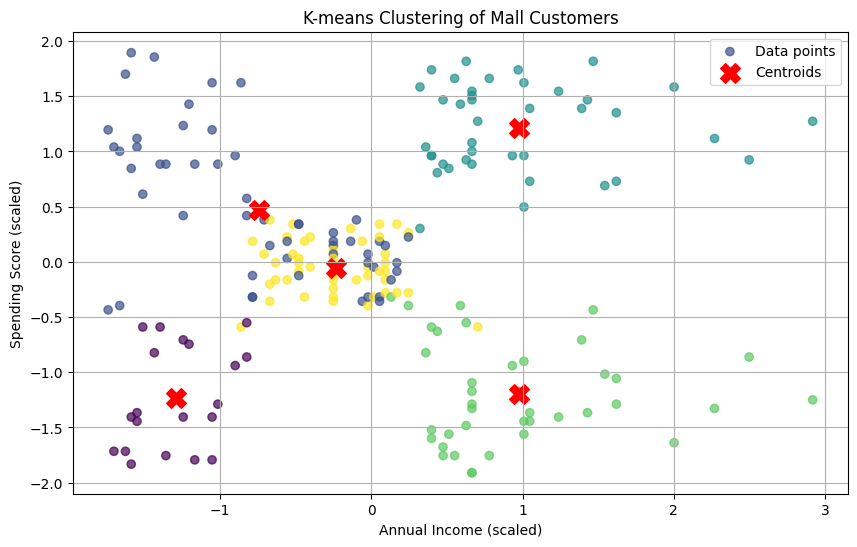

In [11]:
data['Cluster'] = clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=clusters, cmap='viridis', marker='o', alpha=0.7, label='Data points')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering of Mall Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()

#### Analyzing cluster characteristics

In [12]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Scale back to original
cluster_df = pd.DataFrame(cluster_centers, columns=['Average Age', 'Average Annual Income', 'Average Spending Score'])
cluster_df['Count'] = data['Cluster'].value_counts().sort_index()
print(cluster_df)

   Average Age  Average Annual Income  Average Spending Score  Count
0    46.250000              26.750000               18.350000     20
1    25.185185              41.092593               62.240741     54
2    32.875000              86.100000               81.525000     40
3    39.871795              86.102564               19.358974     39
4    55.638298              54.382979               48.851064     47
